API Pull Using Python 

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '839d336f-6ce9-4547-86de-ca2a26c13597',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-01T00:13:16.600Z', 'error_code': 0, 'error_message': None, 'elapsed': 357, 'credit_count': 1, 'notice': None, 'total_count': 9834}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11747, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)

dict

In [18]:
import pandas as pd

#View all columns
pd.set_option("display.max.columns", None)

pd.set_option("display.max.rows", None)

In [9]:
#Normalize the data 

df = pd.json_normalize(data["data"])

df["timestamp"] = pd.to_datetime("now")

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11747,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976112e+07,1.976112e+07,False,NaN,1,NaN,NaN,None,2024-10-01T00:12:00.000Z,63238.094388,3.710122e+10,149.4796,-0.513707,-3.546642,-0.023844,7.107011,-3.308656,1.821452,1.249656e+12,56.0190,1.328000e+12,None,2024-10-01T00:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-01 01:13:29.240508
1,1027,Ethereum,ETH,ethereum,9367,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203680e+08,1.203680e+08,True,NaN,2,NaN,NaN,None,2024-10-01T00:11:00.000Z,2605.298031,1.783808e+10,60.1608,-0.074401,-1.981698,-1.576689,3.603904,-18.662340,-23.826356,3.135944e+11,14.0650,3.135944e+11,None,2024-10-01T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-01 01:13:29.240508
2,825,Tether USDt,USDT,tether,99068,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.196293e+11,1.213727e+11,True,NaN,3,NaN,NaN,None,2024-10-01T00:11:00.000Z,0.999671,6.429860e+10,63.9168,-0.005729,-0.048438,-0.042080,-0.011088,0.048964,0.120137,1.195900e+11,5.3647,1.213328e+11,None,2024-10-01T00:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-01 01:13:29.240508
3,1839,BNB,BNB,bnb,2251,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459328e+08,1.459328e+08,False,NaN,4,NaN,NaN,None,2024-10-01T00:11:00.000Z,568.231769,1.959371e+09,18.8482,-0.473803,-4.476388,-6.129889,6.626628,-1.313246,-1.912501,8.292365e+10,3.7174,8.292365e+10,None,2024-10-01T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-01 01:13:29.240508
4,5426,Solana,SOL,solana,747,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.683966e+08,5.856819e+08,True,NaN,5,NaN,NaN,None,2024-10-01T00:11:00.000Z,152.694891,2.374324e+09,33.7200,-0.988238,-3.725469,5.581973,12.709440,-9.130628,-0.749639,7.152176e+10,3.2082,8.943064e+10,None,2024-10-01T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-01 01:13:29.240508
5,3408,USDC,USDC,usd-coin,22248,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.555440e+10,3.555440e+10,False,NaN,6,NaN,NaN,None,2024-10-01T00:11:00.000Z,0.999877,6.670816e+09,117.2359,-0.004251,-0.005118,-0.014233,0.001199,-0.019549,-0.002122,3.555000e+10,1.5937,3.555000e+10,None,2024-10-01T00:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-01 01:13:29.240508
6,52,XRP,XRP,xrp,1397,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-10-01T00:12:00.000Z,0.613764,2.036828e+09,-8.5578,-0.900765,-4.541192,4.930698,8.332336,3.144439,26.582690,3.471699e+10,1.5574,6.137644e+10,None,2024-10-01T00:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-01 01:13:29.240508
7,74,Dogecoin,DOGE,dogecoin,1075,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.461782e+11,1.461782e+11,True,NaN,8,NaN,NaN,None,2024-10-01T00:12:00.000Z,0.114706,9.713686e+08,13.6707,-0.837501,-7.490529,6.245567,13.082863,-3.816173,-8.368454,1.676745e+10,0.7522,1.676745e+10,None,2024-10-01T00:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-01 01:13:29.240508
8,11419,Toncoin,TON,toncoin,569,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.5259

In [38]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '839d336f-6ce9-4547-86de-ca2a26c13597',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data["data"])
    df2["timestamp"] = pd.to_datetime("now")
    df = pd.concat([df, df2])

    if not os.path.isfile(r"C:\Users\USER\Desktop\Coin Market Cap API\API.csv"):
        df.to_csv(r"C:\Users\USER\Desktop\Coin Market Cap API\API.csv", header = "column_names")
    else:df.to_csv(r"C:\Users\USER\Desktop\Coin Market Cap API\API.csv", mode = "a", header = False)

In [40]:
import os
from time import time 
from time import sleep 

for i in range(333):
    api_runner()
    print("API Runner Completed Successfully")
    sleep(60)
exit()

{'status': {'timestamp': '2024-10-03T08:58:06.014Z', 'error_code': 0, 'error_message': None, 'elapsed': 10, 'credit_count': 1, 'notice': None, 'total_count': 9844}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11752, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [30]:
df72 = pd.read_csv(r"C:\Users\USER\Desktop\Coin Market Cap API\API.csv")

df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11752,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976225e+07,1.976225e+07,False,NaN,1,NaN,NaN,NaN,2024-10-03T08:43:00.000Z,60387.934969,4.122784e+10,-17.5084,-1.356956,-2.420686,-5.333896,2.794541,-0.263328,11.188553,1.193402e+12,57.0235,1.268147e+12,NaN,2024-10-03T08:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:44:36.188821
1,1,1027,Ethereum,ETH,ethereum,9372,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203715e+08,1.203715e+08,True,NaN,2,NaN,NaN,NaN,2024-10-03T08:42:00.000Z,2344.820718,2.087232e+10,-16.9077,-1.428975,-5.653766,-10.662034,-6.185720,-19.414115,-18.233553,2.822496e+11,13.4943,2.822496e+11,NaN,2024-10-03T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:44:36.188821
2,2,825,Tether USDt,USDT,tether,99300,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.196406e+11,1.213726e+11,True,NaN,3,NaN,NaN,NaN,2024-10-03T08:42:00.000Z,0.999841,7.072682e+10,-19.1542,-0.009956,-0.006144,-0.010199,0.001908,0.055131,0.017749,1.196216e+11,5.7158,1.213534e+11,NaN,2024-10-03T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-03 09:44:36.188821
3,3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459326e+08,1.459326e+08,False,NaN,4,NaN,NaN,NaN,2024-10-03T08:42:00.000Z,541.746677,1.784675e+09,-16.3229,-1.216917,-2.719455,-9.203728,1.720573,3.157584,16.055043,7.905851e+10,3.7798,7.905851e+10,NaN,2024-10-03T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:44:36.188821
4,4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.684924e+08,5.858309e+08,True,NaN,5,NaN,NaN,NaN,2024-10-03T08:42:00.000Z,137.280782,3.014053e+09,-20.4268,-2.997696,-7.346310,-9.327530,2.993535,-3.234721,10.548153,6.431501e+10,3.0731,8.042332e+10,NaN,2024-10-03T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:44:36.188821
5,5,3408,USDC,USDC,usd-coin,22269,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.557678e+10,3.557678e+10,False,NaN,6,NaN,NaN,NaN,2024-10-03T08:42:00.000Z,0.999933,7.195450e+09,-30.1820,0.005886,-0.006698,-0.007333,0.001323,0.002481,-0.007725,3.557440e+10,1.6998,3.557440e+10,NaN,2024-10-03T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-03 09:44:36.188821
6,6,52,XRP,XRP,xrp,1398,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,NaN,2024-10-03T08:43:00.000Z,0.517714,3.175955e+09,13.7877,-1.895115,-14.051341,-11.820525,-8.691198,-5.822731,29.312768,2.928400e+10,1.3993,5.177141e+10,NaN,2024-10-03T08:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:44:36.188821
7,7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.462104e+11,1.462104e+11,True,NaN,8,NaN,NaN,NaN,2024-10-03T08:43:00.000Z,0.103073,8.820532e+08,-32.9869,-2.351424,-5.260853,-9.979144,4.286690,-3.795840,8.733307,1.507030e+10,0.7201,1.507030e+10,NaN,2024-10-03T08:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:44:36.188821
8,8,1958,TRON,TRX,tron,1042,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer

In [42]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11752,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976225e+07,1.976225e+07,False,NaN,1,NaN,NaN,None,2024-10-03T08:48:00.000Z,60347.280187,4.137008e+10,-17.2193,-1.234481,-2.423265,-5.381637,2.569934,-0.390008,11.419769,1.192598e+12,56.8870,1.267293e+12,None,2024-10-03T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817
1,1027,Ethereum,ETH,ethereum,9372,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203715e+08,1.203715e+08,True,NaN,2,NaN,NaN,None,2024-10-03T08:47:00.000Z,2345.190135,2.090537e+10,-16.7263,-1.118805,-5.534537,-10.585693,-6.101280,-19.465817,-17.932408,2.822941e+11,13.4624,2.822941e+11,None,2024-10-03T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817
2,825,Tether USDt,USDT,tether,99300,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.196406e+11,1.213726e+11,True,NaN,3,NaN,NaN,None,2024-10-03T08:47:00.000Z,1.000129,7.084444e+10,-18.9981,0.025074,0.031308,0.023917,0.028184,0.063527,0.038586,1.196560e+11,5.7076,1.213883e+11,None,2024-10-03T08:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-03 09:48:40.424817
3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459326e+08,1.459326e+08,False,NaN,4,NaN,NaN,None,2024-10-03T08:47:00.000Z,542.533324,1.786577e+09,-16.1796,-0.869596,-2.495730,-8.945546,1.892815,3.113160,16.480496,7.917331e+10,3.7756,7.917331e+10,None,2024-10-03T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.684924e+08,5.858309e+08,True,NaN,5,NaN,NaN,None,2024-10-03T08:47:00.000Z,137.399402,3.021423e+09,-20.2002,-2.685476,-7.160252,-9.077489,3.201392,-3.373630,11.315219,6.437058e+10,3.0705,8.049281e+10,None,2024-10-03T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817
5,3408,USDC,USDC,usd-coin,22269,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.557678e+10,3.557678e+10,False,NaN,6,NaN,NaN,None,2024-10-03T08:47:00.000Z,1.000332,7.214679e+09,-29.9503,0.037165,0.032934,0.037443,0.038546,0.039567,0.037450,3.558859e+10,1.6976,3.558859e+10,None,2024-10-03T08:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-03 09:48:40.424817
6,52,XRP,XRP,xrp,1398,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-10-03T08:48:00.000Z,0.516007,3.184134e+09,14.1331,-1.798679,-14.294868,-12.014400,-8.981333,-6.224747,29.083044,2.918745e+10,1.3922,5.160072e+10,None,2024-10-03T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817
7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462104e+11,1.462104e+11,True,NaN,8,NaN,NaN,None,2024-10-03T08:48:00.000Z,0.103046,8.840308e+08,-32.7880,-2.178174,-5.254013,-9.772746,4.266029,-3.805029,9.024410,1.506635e+10,0.7187,1.506635e+10,None,2024-10-03T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817
8,1958,TRON,TRX,tron,1042,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.659700e+

In [46]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [50]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11752,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19762253.00000,19762253.00000,False,NaN,1,NaN,NaN,None,2024-10-03T08:48:00.000Z,60347.28019,41370077430.29509,-17.21930,-1.23448,-2.42327,-5.38164,2.56993,-0.39001,11.41977,1192598218915.28418,56.88700,1267292883924.77002,None,2024-10-03T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817
1,1027,Ethereum,ETH,ethereum,9372,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120371514.66971,120371514.66971,True,NaN,2,NaN,NaN,None,2024-10-03T08:47:00.000Z,2345.19013,20905366852.52808,-16.72630,-1.11881,-5.53454,-10.58569,-6.10128,-19.46582,-17.93241,282294088697.98230,13.46240,282294088697.97998,None,2024-10-03T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817
2,825,Tether USDt,USDT,tether,99300,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119640575156.22914,121372645827.97424,True,NaN,3,NaN,NaN,None,2024-10-03T08:47:00.000Z,1.00013,70844442622.85397,-18.99810,0.02507,0.03131,0.02392,0.02818,0.06353,0.03859,119655959169.57652,5.70760,121388252560.06000,None,2024-10-03T08:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-03 09:48:40.424817
3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932619.72556,145932619.72556,False,NaN,4,NaN,NaN,None,2024-10-03T08:47:00.000Z,542.53332,1786577391.49290,-16.17960,-0.86960,-2.49573,-8.94555,1.89281,3.11316,16.48050,79173309304.73894,3.77560,79173309304.74001,None,2024-10-03T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468492415.58110,585830862.60223,True,NaN,5,NaN,NaN,None,2024-10-03T08:47:00.000Z,137.39940,3021422568.29409,-20.20020,-2.68548,-7.16025,-9.07749,3.20139,-3.37363,11.31522,64370577757.57721,3.07050,80492810213.70000,None,2024-10-03T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-03 09:48:40.424817


In [54]:
df3 = df.groupby("name", sort = False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.20817,-2.52012,-5.49810,2.46538,-0.51397,11.17594
Ethereum,-1.28458,-5.76645,-10.83408,-6.50294,-19.63900,-18.21501
Tether USDt,0.00192,0.01294,0.00986,0.00596,0.05286,0.01154
BNB,-0.93697,-2.73142,-9.18767,1.57874,2.85072,16.90983
Solana,-2.87933,-7.79294,-9.64754,2.44144,-4.05198,10.70978
USDC,0.00118,0.00606,0.00575,0.00927,0.00808,-0.00144
XRP,-1.80782,-14.59823,-12.38208,-9.38418,-6.58252,28.76429
Dogecoin,-2.44863,-5.71576,-10.24579,3.54746,-4.28809,8.49588
TRON,-0.44536,-0.13882,1.62229,0.77723,20.60023,26.92920


In [56]:
df4 = df3.stack()

df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -1.20817
              quote.USD.percent_change_24h    -2.52012
              quote.USD.percent_change_7d     -5.49810
              quote.USD.percent_change_30d     2.46538
              quote.USD.percent_change_60d    -0.51397
              quote.USD.percent_change_90d    11.17594
Ethereum      quote.USD.percent_change_1h     -1.28458
              quote.USD.percent_change_24h    -5.76645
              quote.USD.percent_change_7d    -10.83408
              quote.USD.percent_change_30d    -6.50294
              quote.USD.percent_change_60d   -19.63900
              quote.USD.percent_change_90d   -18.21501
Tether USDt   quote.USD.percent_change_1h      0.00192
              quote.USD.percent_change_24h     0.01294
              quote.USD.percent_change_7d      0.00986
              quote.USD.percent_change_30d     0.00596
              quote.USD.percent_change_60d     0.05286
              quote.US

In [58]:
type(df4)

pandas.core.series.Series

In [60]:
df5 = df4.to_frame(name = "values")

df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -1.20817
             quote.USD.percent_change_24h  -2.52012
             quote.USD.percent_change_7d   -5.49810
             quote.USD.percent_change_30d   2.46538
             quote.USD.percent_change_60d  -0.51397
             quote.USD.percent_change_90d  11.17594
Ethereum     quote.USD.percent_change_1h   -1.28458
             quote.USD.percent_change_24h  -5.76645
             quote.USD.percent_change_7d  -10.83408
             quote.USD.percent_change_30d  -6.50294
             quote.USD.percent_change_60d -19.63900
             quote.USD.percent_change_90d -18.21501
Tether USDt  quote.USD.percent_change_1h    0.00192
             quote.USD.percent_change_24h   0.01294
             quote.USD.percent_change_7d    0.00986
             quote.USD.percent_change_30d   0.00596
             quote.USD.percent_change_60d   0.05286
             quote.USD.percent_change_90d   0.01154
BNB          quote.USD.percent_change_1h   -0.93697
             quote.USD.percent_change_24h  -2.73142
             quote.USD.percent_change_7d   -9.18767
             quote.USD.percent_change_30d   1.57874
             quote.USD.percent_change_60d   2.85072
             quote.USD.percent_change_90d  16.90983
Solana       quote.USD.percent_change_1h   -2.87933
             quote.USD.percent_change_24h  -7.79294
             quote.USD.percent_change_7d   -9.64754
             quote.USD.percent_change_30d   2.44144
             quote.USD.percent_change_60d  -4.05198
             quote.USD.percent_change_90d  10.70978
USDC         quote.USD.percent_change_1h    0.00118
             quote.USD.percent_change_24h   0.00606
             quote.USD.percent_change_7d    0.00575
             quote.USD.percent_change_30d   0.00927
             quote.USD.percent_change_60d   0.00808
             quote.USD.percent_change_90d  -0.00144
XRP          quote.USD.percent_change_1h   -1.80782
             quote.USD.percent_change_24h -14.59823
             quote.USD.percent_change_7d  -12.38208
             quote.USD.percent_change_30d  -9.38418
             quote.USD.percent_change_60d  -6.58252
             quote.USD.percent_change_90d  28.76429
Dogecoin     quote.USD.percent_change_1h   -2.44863
             quote.USD.percent_change_24h  -5.71576
             quote.USD.percent_change_7d  -10.24579
             quote.USD.percent_change_30d   3.54746
             quote.USD.percent_change_60d  -4.28809
             quote.USD.percent_change_90d   8.49588
TRON         quote.USD.percent_change_1h   -0.44536
             quote.USD.percent_change_24h  -0.13882
             quote.USD.percent_change_7d    1.62229
             quote.USD.percent_change_30d   0.77723
             quote.USD.percent_change_60d  20.60023
             quote.USD.percent_change_90d  26.92920
Toncoin      quote.USD.percent_change_1h   -1.31432
             quote.USD.percent_change_24h  -5.41917
             quote.USD.percent_change_7d  -10.63604
             quote.USD.percent_change_30d   0.15138
             quote.USD.percent_change_60d -13.00328
             quote.USD.percent_change_90d -20.86914
Cardano      quote.USD.percent_change_1h   -2.65587
             quote.USD.percent_change_24h  -6.58728
             quote.USD.percent_change_7d  -15.43728
             quote.USD.percent_change_30d   1.82239
             quote.USD.percent_change_60d  -6.80171
             quote.USD.percent_change_90d   3.93982
Avalanche    quote.USD.percent_change_1h   -1.96544
             quote.USD.percent_change_24h  -7.78962
             quote.USD.percent_change_7d  -11.85258
             quote.USD.percent_change_30d  10.54042
             quote.USD.percent_change_60d   8.36963
             quote.USD.percent_change_90d   7.59061
Shiba Inu    quote.USD.percent_change_1h   -2.45008
             quote.USD.percent_change_24h  -5.84819
             quote.USD.percent_change_7d   -6.00073
             quote.USD.percent_change_30d

In [62]:
type(df5)

pandas.core.frame.DataFrame

In [64]:
df5.count()

values    90
dtype: int64

In [70]:
index = pd.Index(range(90))

df6 = df5.reset_index()

df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.20817
1,Bitcoin,quote.USD.percent_change_24h,-2.52012
2,Bitcoin,quote.USD.percent_change_7d,-5.49810
3,Bitcoin,quote.USD.percent_change_30d,2.46538
4,Bitcoin,quote.USD.percent_change_60d,-0.51397
5,Bitcoin,quote.USD.percent_change_90d,11.17594
6,Ethereum,quote.USD.percent_change_1h,-1.28458
7,Ethereum,quote.USD.percent_change_24h,-5.76645
8,Ethereum,quote.USD.percent_change_7d,-10.83408
9,Ethereum,quote.USD.percent_change_30d,-6.50294


In [74]:
df7 = df6.rename(columns = {"level_1": "percent_change"})

df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.20817
1,Bitcoin,quote.USD.percent_change_24h,-2.52012
2,Bitcoin,quote.USD.percent_change_7d,-5.49810
3,Bitcoin,quote.USD.percent_change_30d,2.46538
4,Bitcoin,quote.USD.percent_change_60d,-0.51397
5,Bitcoin,quote.USD.percent_change_90d,11.17594
6,Ethereum,quote.USD.percent_change_1h,-1.28458
7,Ethereum,quote.USD.percent_change_24h,-5.76645
8,Ethereum,quote.USD.percent_change_7d,-10.83408
9,Ethereum,quote.USD.percent_change_30d,-6.50294


In [84]:
df7["percent_change"] = df7["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"], ["1h", "24h", "7d", "30d", "60d", "90d"])

df7

,name,percent_change,values
0,Bitcoin,1h,-1.20817
1,Bitcoin,24h,-2.52012
2,Bitcoin,7d,-5.49810
3,Bitcoin,30d,2.46538
4,Bitcoin,60d,-0.51397
5,Bitcoin,90d,11.17594
6,Ethereum,1h,-1.28458
7,Ethereum,24h,-5.76645
8,Ethereum,7d,-10.83408
9,Ethereum,30d,-6.50294


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

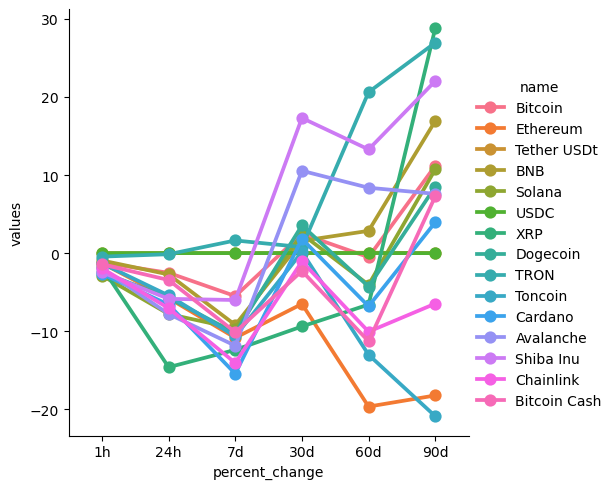

In [88]:
sns.catplot(x = "percent_change", y = "values", hue = "name", data = df7, kind = "point")

In [94]:
df8 = df[["name", "quote.USD.price", "timestamp"]]

df8 = df8.query("name == 'Bitcoin'")

df8

,name,quote.USD.price,timestamp
0,Bitcoin,60347.28019,2024-10-03 09:48:40.424817
0,Bitcoin,60206.90793,2024-10-03 09:58:05.965725
0,Bitcoin,60201.77753,2024-10-03 09:59:06.971005
0,Bitcoin,60250.22608,2024-10-03 10:00:08.052516


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

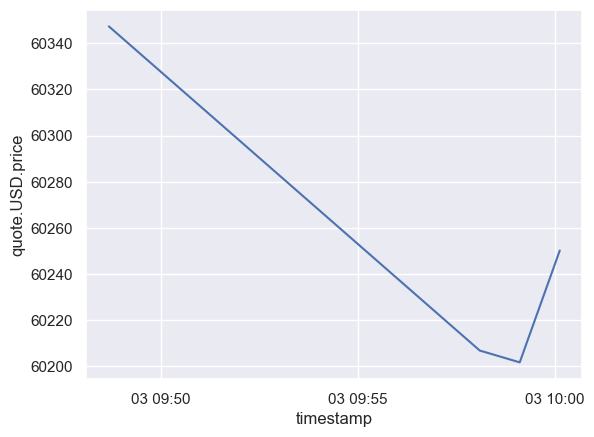

In [98]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x = "timestamp", y = "quote.USD.price", data = df8)